In [ ]:
# import the pandas library for data manipulation and analysis
import pandas as pd

# import the NumPy library for numerical operations on arrays and matrices
import numpy as np

# import the 'train_test_split' function from the 'model_selection' module in scikit-learn
from sklearn.model_selection import train_test_split

# import the 'accuracy_score' function from the 'metrics' module in scikit-learn
from sklearn.metrics import accuracy_score

# read a CSV file and create a DataFrame
df = pd.read_csv("/content/water_potability.csv")

# display the first few rows of the DataFrame
df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
# print the shape of the DataFrame
print(df.shape)

(3276, 10)


In [ ]:
# count the number of missing values in each column
missing_values = df.isnull().sum()

In [ ]:
# count the number of missing values in each column
missing_values = df.isnull().sum()

In [ ]:

# drop all rows that contain any missing values
df = df.dropna()


<Axes: ylabel='Potability'>

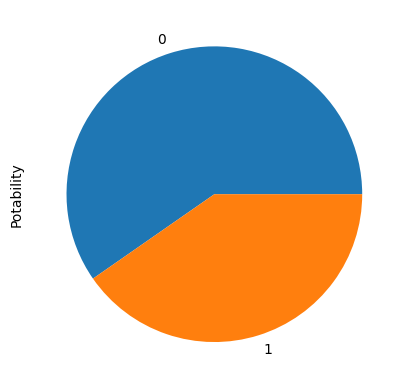

In [ ]:
#Plots
import matplotlib.pyplot as plt
import seaborn as sns

# create a pie chart to visualize the distribution of Potability
df.Potability.value_counts().plot(kind='pie')

Thus it is an imbalanced dataset, since 0 is much more 1 (1998>1278) So we need to balance the data so that there is no biasedness.

In [ ]:
df.Potability.value_counts()

0    1200
1     811
Name: Potability, dtype: int64

We have to resample the data and make 0 and 1 equal to make the data set balanced

In [ ]:
zero  = df[df['Potability']==0]   #zero values in Potability column
one = df[df['Potability']==1]  # one values in Potability column

In [ ]:
from sklearn.utils import resample
#minority class that  is 1, we need to upsample/increase that class so that there is no bias
df_minority_upsampled = resample(one, replace = True, n_samples = 1200)
#concatenate
df = pd.concat([zero, df_minority_upsampled])

from sklearn.utils import shuffle
df = shuffle(df) # shuffling so that there is particular sequence

<Axes: ylabel='Potability'>

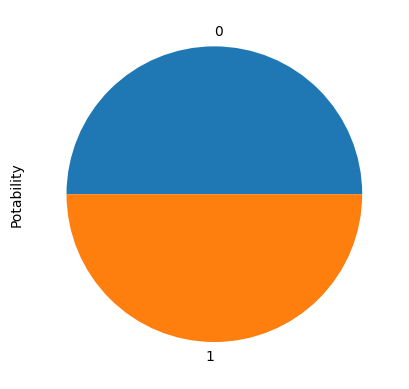

In [ ]:
# create a pie chart to visualize the distribution of Potability
df.Potability.value_counts().plot(kind='pie')

<Axes: >

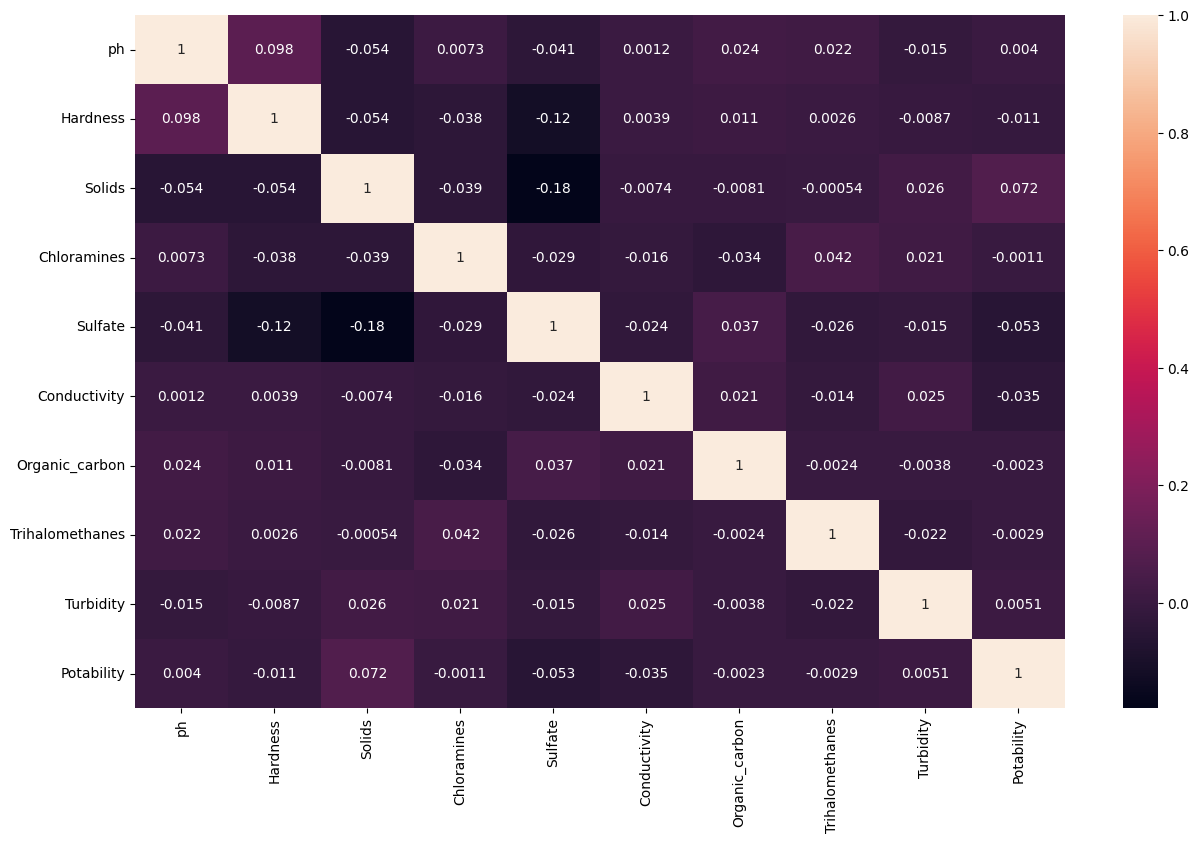

In [ ]:
#understanding correlation
# create a heatmap of the correlation matrix
plt.figure(figsize=(15, 9))
sns.heatmap(df.corr(), annot=True)

In [ ]:
# create the feature set X and the target variable set y
X = df.drop('Potability', axis=1)
y = df['Potability']
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# import the LogisticRegression model from scikit-learn
from sklearn.linear_model import LogisticRegression

# create a new instance of the LogisticRegression model
model = LogisticRegression()

# train the model on the training data
model.fit(X_train, y_train)

# calculate the accuracy of the trained model on the testing data
lr = model.score(X_test, y_test) * 100

# print the accuracy of the LogisticRegression model on the testing data
print("Accuracy:", lr)


Accuracy: 56.458333333333336


In [ ]:
# import the LogisticRegression model from scikit-learn
from sklearn.linear_model import LogisticRegression

# create a new instance of the LogisticRegression model
model = LogisticRegression()

# train the model on the training data
model.fit(X_train, y_train)

# calculate the accuracy of the trained model on the testing data
lr = model.score(X_test, y_test) * 100

# print the accuracy of the LogisticRegression model on the testing data
print("Accuracy:", lr)

Accuracy: 86.458333333333336


In [ ]:
# import the Gaussian Naive Bayes model from scikit-learn
from sklearn.naive_bayes import GaussianNB

# create a new instance of the Gaussian Naive Bayes model
classifire = GaussianNB()

# train the model on the training data
classifire.fit(X_train, y_train)

# calculate the accuracy of the trained model on the testing data
nb = classifire.score(X_test, y_test) * 100

# print the accuracy of the Gaussian Naive Bayes model on the testing data
print("Accuracy:", nb)


Accuracy: 60.83333333333333


In [ ]:
# import the DecisionTreeClassifier model from scikit-learn
from sklearn.tree import DecisionTreeClassifier
# create a new instance of the DecisionTreeClassifier model
modelDT = DecisionTreeClassifier()
# train the model on the training data
modelDT.fit(X_train, y_train)
# calculate the accuracy of the trained model on the testing data
dt = modelDT.score(X_test, y_test) * 100
# print the accuracy of the DecisionTreeClassifier model on the testing data
print("Accuracy:", dt)


Accuracy: 80.83333333333333


In [ ]:
lr=86.45
nb=60.83
dt=80.83

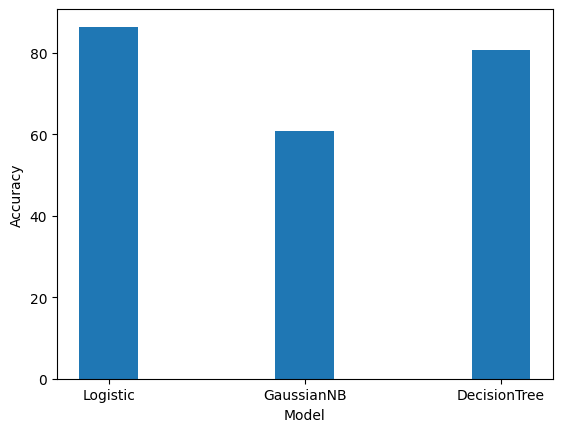

In [ ]:
# import the required libraries
import matplotlib.pyplot as plt
# create lists of the model names and their respective accuracies
X = ["Logistic", "GaussianNB", "DecisionTree"]
Y = [lr, nb, dt]
# create a bar plot to compare the accuracies of the different models
plt.bar(X, Y, width=0.3)
# set the x-axis label
plt.xlabel("Model")
# set the y-axis label
plt.ylabel("Accuracy")
# display the plot
plt.show()
